In [1]:
# kaggle_titanic_eda.iypnb

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# tensorflow warning off
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

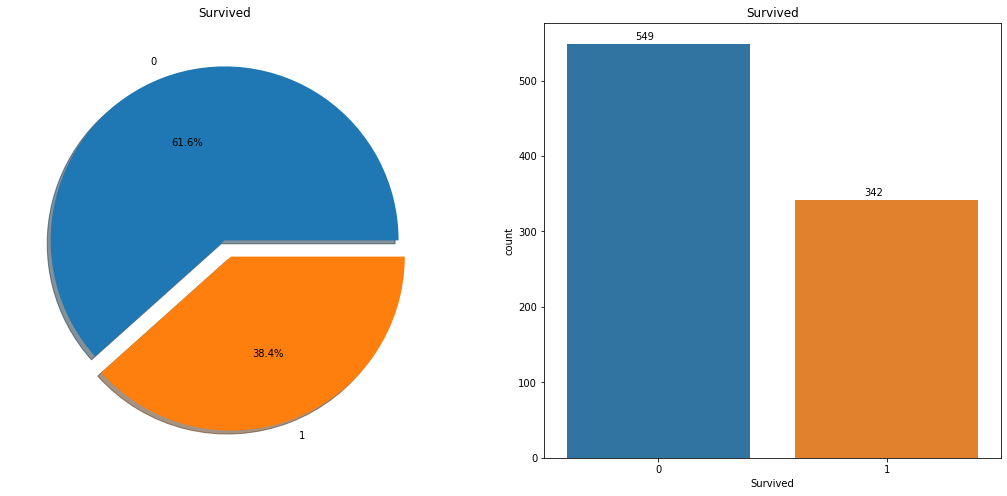

In [9]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0],
                                      shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df, ax=ax[1])
ax[1].set_title('Survived')
for p in ax[1].patches:
    ax[1].annotate( f'{p.get_height():d}', ( p.get_x()+0.3, p.get_height()+5 ) )
plt.show()

In [10]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

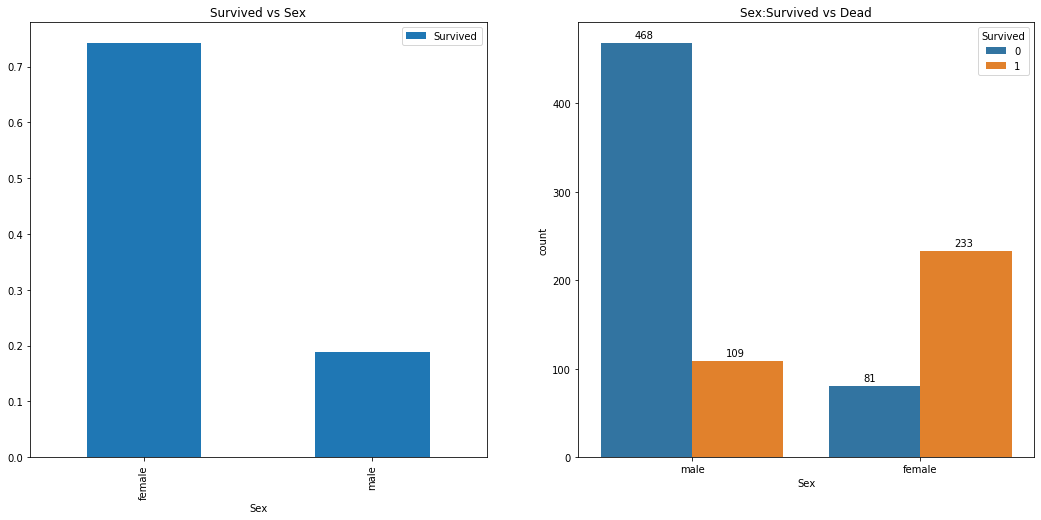

In [11]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
for p in ax[1].patches:
    ax[1].annotate( f'{p.get_height():d}', ( p.get_x()+0.15, p.get_height()+5 ) )
plt.show()

In [13]:
pd.crosstab(df.Pclass, df.Survived, margins=True).style.background_gradient(
    cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [15]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

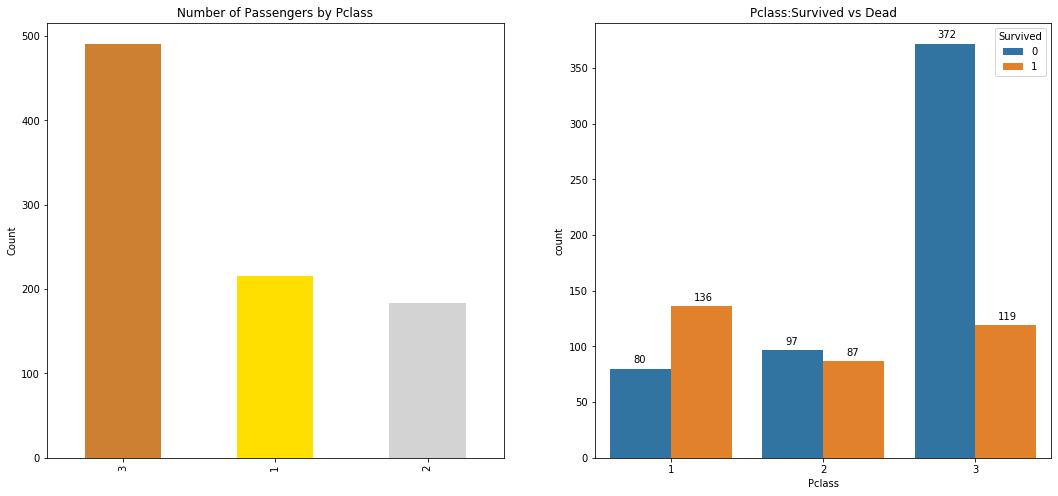

In [19]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
for p in ax[1].patches:
    ax[1].annotate( f'{p.get_height():d}', ( p.get_x()+0.15, p.get_height()+5 ) )
plt.show()

In [20]:
pd.crosstab([df.Sex,df.Survived], df.Pclass, margins=True).style.background_gradient(
    cmap='summer_r')

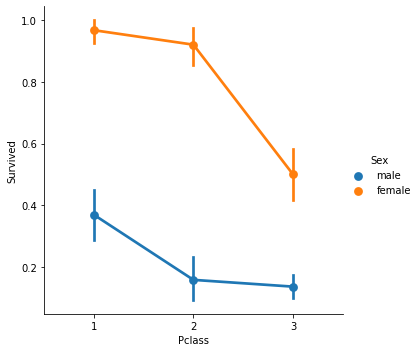

In [22]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df)
plt.show()

In [25]:
print('Old Age:', df['Age'].max())
print('Young Age:', df['Age'].min())
print('Average Age:', df['Age'].mean())

Old Age: 80.0
Young Age: 0.42
Average Age: 29.69911764705882


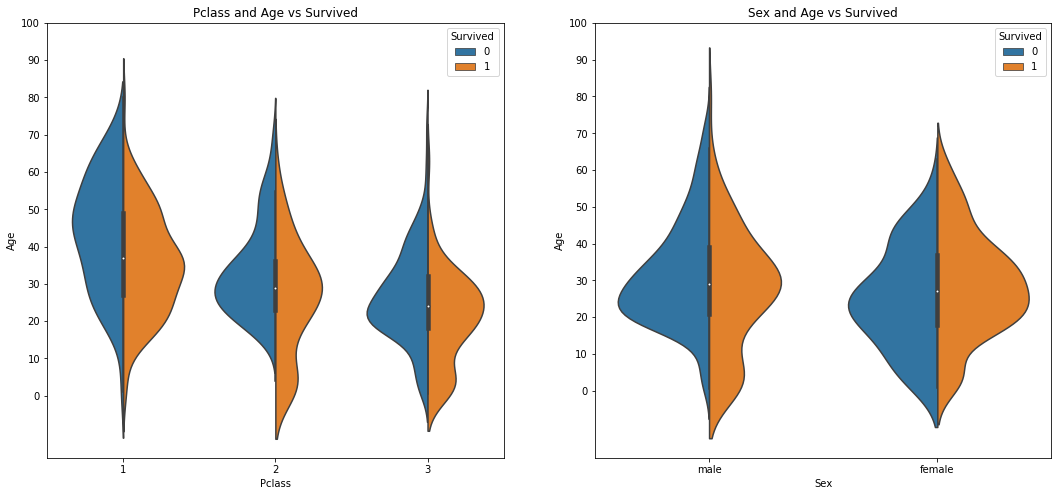

In [31]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue='Survived', data=df, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [33]:
df.Name.str.extract('([A-Za-z]+)\.')

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [46]:
df['Initial'] = 0
for i in df:
    df['Initial'] = df.Name.str.extract('([A-Za-z]+)\.')

In [47]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [48]:
pd.crosstab(df.Initial, df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [49]:
# Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
df['Initial'].replace(
    ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev',
     'Capt','Sir','Don'],
    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other',
     'Mr','Mr','Mr'], inplace=True)

In [50]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [52]:
df.loc[(df.Age.isnull()) & (df.Initial=='Master'), 'Age'] = 5
df.loc[(df.Age.isnull()) & (df.Initial=='Miss'), 'Age'] = 22
df.loc[(df.Age.isnull()) & (df.Initial=='Mr'), 'Age'] = 33
df.loc[(df.Age.isnull()) & (df.Initial=='Mrs'), 'Age'] = 36
df.loc[(df.Age.isnull()) & (df.Initial=='Other'), 'Age'] = 46

In [53]:
df.Age.isnull().any()  # False

False

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Initial      891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


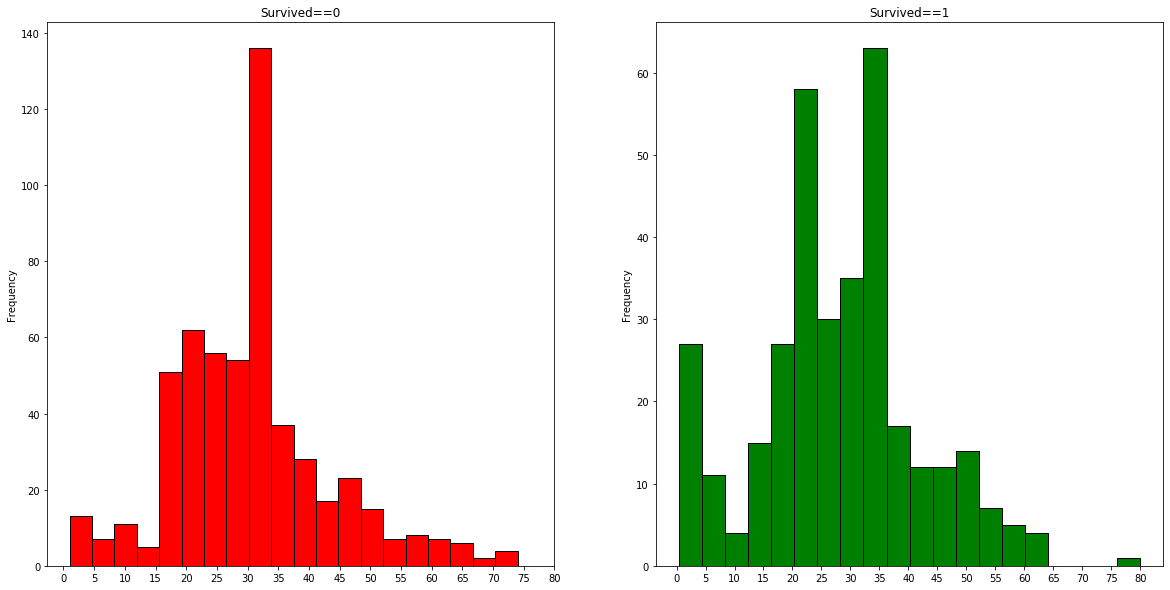

In [58]:
f, ax = plt.subplots(1,2,figsize=(20,10))
df[df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived==0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)
df[df['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
ax[1].set_title('Survived==1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

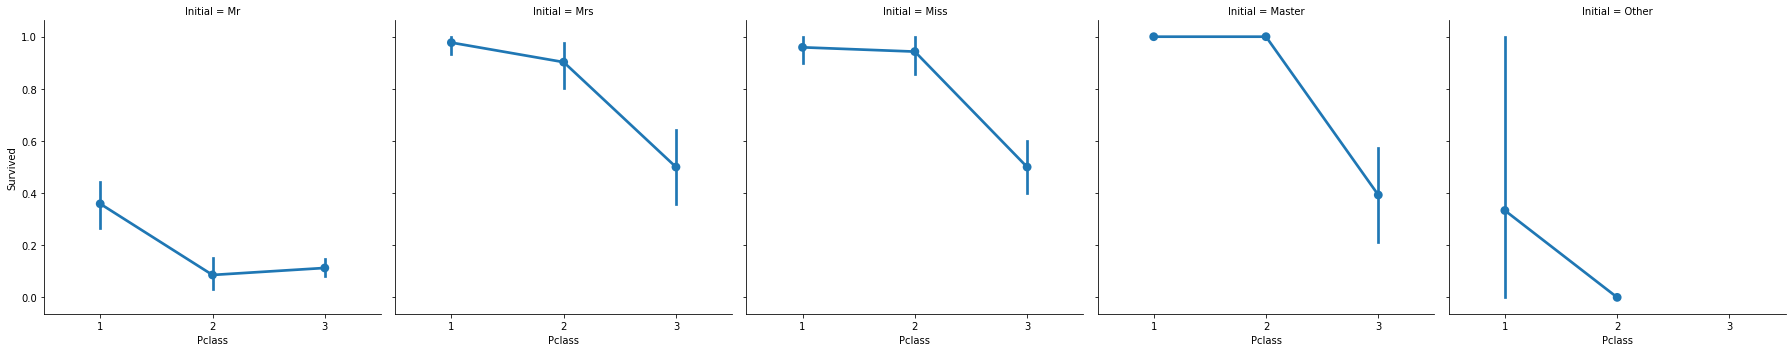

In [59]:
sns.factorplot('Pclass','Survived',col='Initial',data=df)
plt.show()

In [60]:
pd.crosstab([df.Embarked,df.Pclass],[df.Sex,df.Survived],
            margins=True).style.background_gradient(cmap='summer_r')

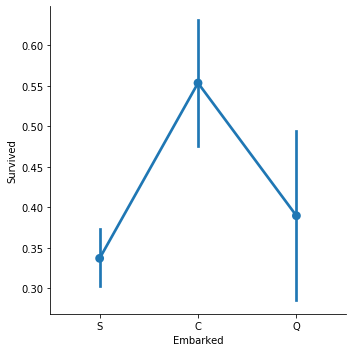

In [62]:
sns.factorplot('Embarked','Survived',data=df)
plt.show()

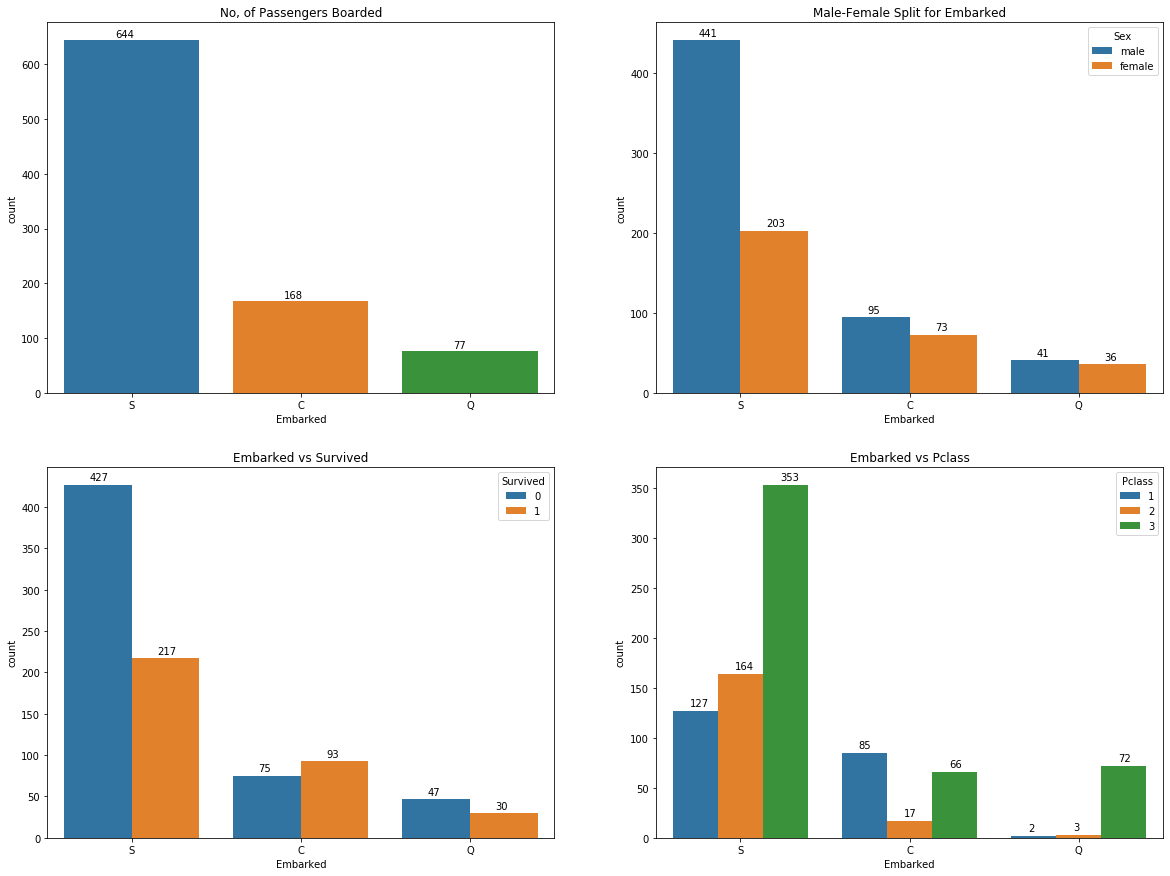

In [75]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df,ax=ax[0,0])
ax[0,0].set_title('No, of Passengers Boarded')
for p in ax[0,0].patches:
    ax[0,0].annotate( f'{p.get_height():d}', ( p.get_x()+0.3, p.get_height()+5 ) )
sns.countplot('Embarked',hue='Sex',data=df,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
for p in ax[0,1].patches:
    ax[0,1].annotate( f'{p.get_height():d}', ( p.get_x()+0.15, p.get_height()+5 ) )
sns.countplot('Embarked',hue='Survived',data=df,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
for p in ax[1,0].patches:
    ax[1,0].annotate( f'{p.get_height():d}', ( p.get_x()+0.15, p.get_height()+5 ) )
sns.countplot('Embarked',hue='Pclass',data=df,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
for p in ax[1,1].patches:
    ax[1,1].annotate( f'{p.get_height():d}', ( p.get_x()+0.1, p.get_height()+5 ) )
plt.show()

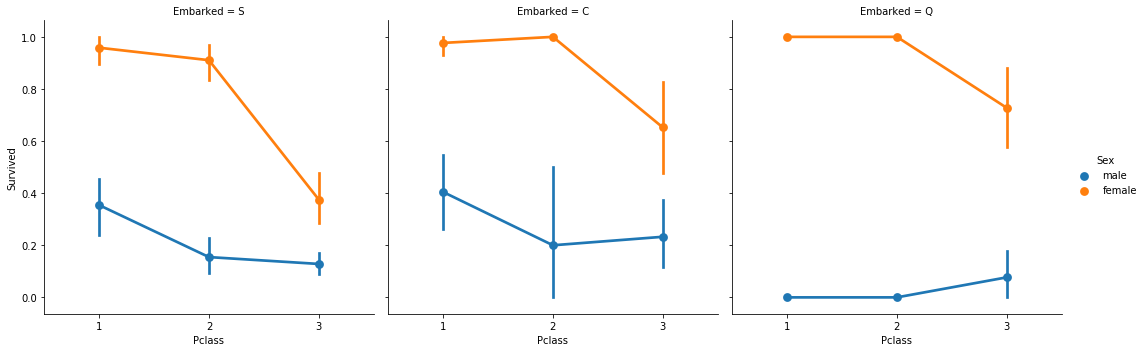

In [76]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=df)
plt.show()

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Initial      891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [78]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

In [79]:
df['Embarked'].fillna('S', inplace=True)

In [80]:
df['Embarked'].isnull().any()  # False

False

In [81]:
pd.crosstab([df.SibSp],df.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


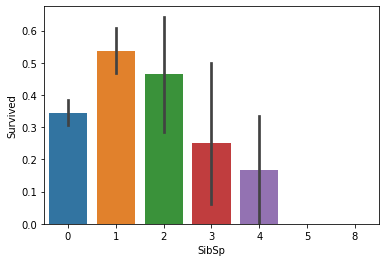

In [85]:
sns.barplot('SibSp', 'Survived', data=df)
plt.show()

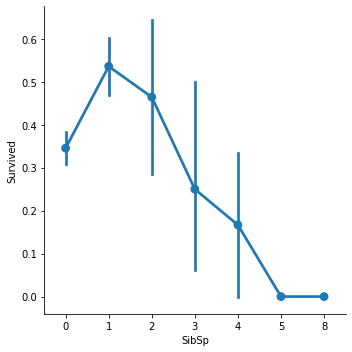

In [87]:
sns.factorplot('SibSp', 'Survived', data=df)
plt.show()

In [89]:
pd.crosstab(df.SibSp, df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [90]:
pd.crosstab(df.Parch, df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


In [93]:
print("Highest Fare:", df['Fare'].max())   # 512.3292
print("Lowest Fare:", df['Fare'].min())    # 0.0
print("Average Fare:", df['Fare'].mean())  # 32.2042079685746

Highest Fare: 512.3292
Lowest Fare: 0.0
Average Fare: 32.2042079685746


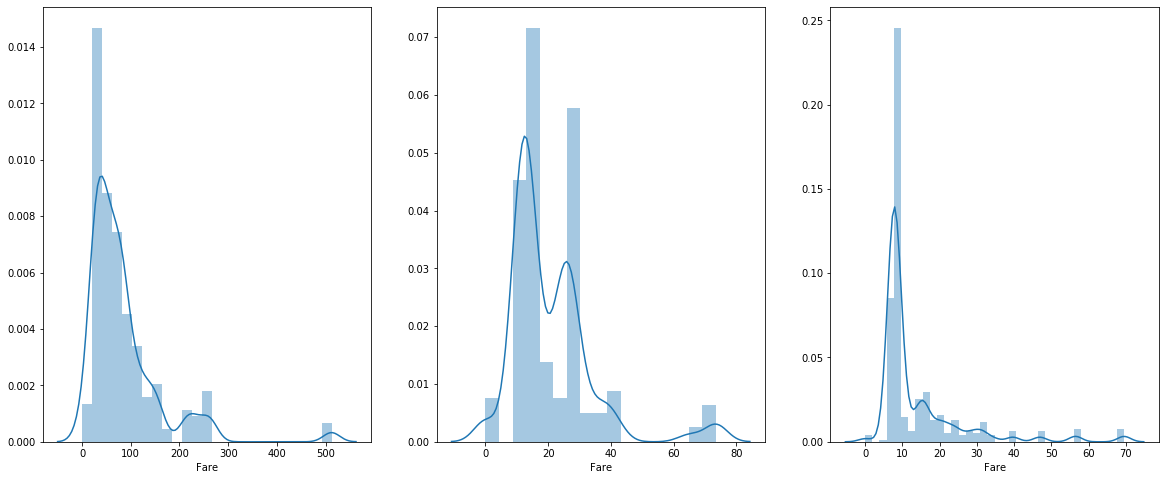

In [94]:
f, ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(df[df['Pclass']==1].Fare,ax=ax[0])
sns.distplot(df[df['Pclass']==2].Fare,ax=ax[1])
sns.distplot(df[df['Pclass']==3].Fare,ax=ax[2])
plt.show()

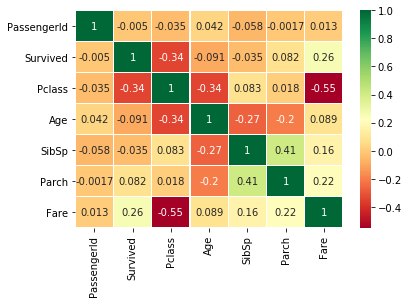

In [95]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
plt.show()

In [96]:
df['Age_band'] = 0
df.loc[df['Age']<=16, 'Age_band'] = 0
df.loc[(df['Age']>16)&(df['Age']<=32), 'Age_band'] = 1
df.loc[(df['Age']>32)&(df['Age']<=48), 'Age_band'] = 2
df.loc[(df['Age']>48)&(df['Age']<=64), 'Age_band'] = 3
df.loc[df['Age']>64, 'Age_band'] = 4

In [97]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1


In [98]:
df['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


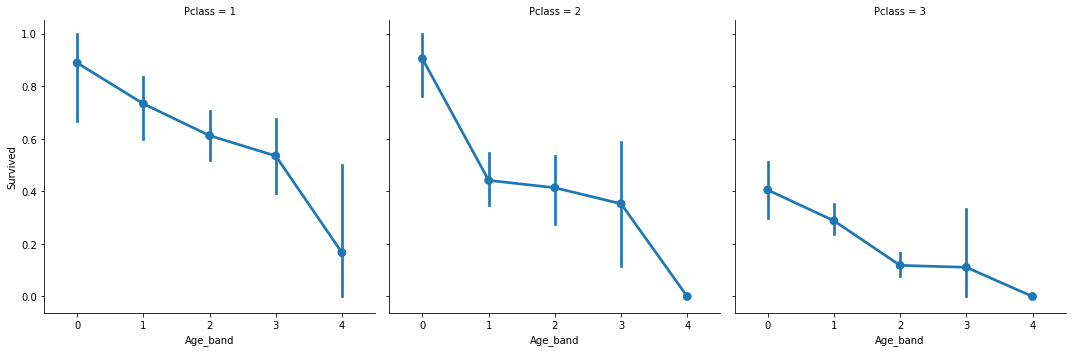

In [99]:
sns.factorplot('Age_band', 'Survived', data=df, col='Pclass')
plt.show()

In [100]:
df['Family_Size'] = 0
df['Family_Size'] = df['Parch'] + df['SibSp']

In [101]:
df['Alone'] = 0
df.loc[df.Family_Size==0, 'Alone'] = 1

In [102]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,1,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1,0,1


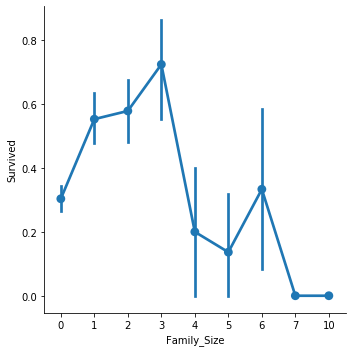

In [103]:
sns.factorplot('Family_Size', 'Survived', data=df)

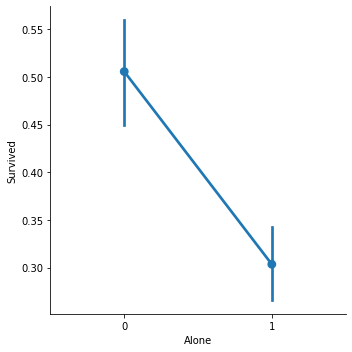

In [104]:
sns.factorplot('Alone', 'Survived', data=df)